## 1.数据初步探索

In [1]:
# 导入基本包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 导入数据
weather = pd.read_csv('weather.csv',index_col=0)
pd.set_option('max_columns',100)
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


In [3]:
# 随机抽取10000条数据进行处理
df = weather.sample(n=10000,random_state=0)
df.index = range(df.shape[0])

In [4]:
df.shape

(10000, 22)

In [5]:
# 构建基本信息表

In [6]:
df_info = pd.DataFrame(df.isnull().mean())

In [7]:
df_info['Data_type'] = df.dtypes

In [8]:
df_info = df_info.reset_index()

In [9]:
df_info.columns = ['Var','NA_rate','Data_type']

In [10]:
df_info

,Var,NA_rate,Data_type
0,Date,0.0000,object
1,Location,0.0000,object
2,MinTemp,0.0058,float64
3,MaxTemp,0.0020,float64
4,Rainfall,0.0110,float64
5,Evaporation,0.4360,float64
6,Sunshine,0.4813,float64
7,WindGustDir,0.0691,object
8,WindGustSpeed,0.0685,float64
9,WindDir9am,0.0718,object


In [11]:
# 按照变量探索

In [12]:
df.describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
MinTemp,9942.0,12.223516,6.404366,-6.9,-2.200,4.1,7.6,12.0,16.9,20.8,25.800,29.4
MaxTemp,9980.0,23.224128,7.147724,-4.1,8.579,14.5,18.0,22.7,28.3,33.0,40.200,44.7
Rainfall,9890.0,2.312912,7.873990,0.0,0.000,0.0,0.0,0.0,0.8,6.2,36.222,183.4
Evaporation,5640.0,5.378227,4.302460,0.0,0.339,1.4,2.6,4.8,7.2,9.8,17.000,145.0
Sunshine,5187.0,7.705456,3.733353,0.0,0.000,1.8,5.0,8.6,10.6,12.2,13.500,14.3
WindGustSpeed,9315.0,40.002040,13.767265,7.0,15.000,24.0,31.0,39.0,48.0,57.0,83.000,117.0
WindSpeed9am,9912.0,13.993442,8.977840,0.0,0.000,4.0,7.0,13.0,19.0,26.0,39.000,72.0
WindSpeed3pm,9790.0,18.743105,8.936644,0.0,2.000,9.0,13.0,19.0,24.0,30.0,43.000,87.0
Humidity9am,9901.0,68.848298,19.040314,5.0,18.000,44.0,57.0,70.0,83.0,94.0,100.000,100.0
Humidity3pm,9733.0,51.409021,20.744870,1.0,9.000,23.0,36.0,52.0,65.0,79.0,97.000,100.0


从中可以看出Cloud9am Cloud3am为分类变量，验证是否正确

In [13]:
df.Cloud9am.unique()

array([ 1.,  5., nan,  7.,  6.,  0.,  4.,  3.,  8.,  2.])

In [14]:
df.Cloud3pm.unique()

array([ 0.,  4., nan,  1.,  8.,  7.,  5.,  3.,  2.,  6.])

In [15]:
# 查看其它分类变量

In [16]:
df.WindDir9am.unique()

array(['SE', 'SW', 'ESE', 'ENE', 'NNE', 'WNW', 'S', 'SSW', 'WSW', 'N',
       'SSE', 'NNW', 'NE', nan, 'E', 'W', 'NW'], dtype=object)

In [17]:
df.RainTomorrow.unique()

array(['No', 'Yes'], dtype=object)

In [18]:
# 提取数据集的特征和标签

In [19]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]  

In [20]:
print(type(X),type(Y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [21]:
print(X.shape,Y.shape)

(10000, 21) (10000,)


In [22]:
Y.head(2)

0    No
1    No
Name: RainTomorrow, dtype: object

In [23]:
Y.value_counts()

No     7763
Yes    2237
Name: RainTomorrow, dtype: int64

In [24]:
# 切分数据集

In [25]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size = 0.3,random_state = 420)

print(Xtrain.shape,Ytrain.shape,Xtest.shape,Ytest.shape)

(7000, 21) (7000,) (3000, 21) (3000,)


In [26]:
# 恢复索引
for i in [Xtrain,Xtest,Ytrain,Ytest]:
    i.index = range(i.shape[0])

## 2.探索标签

In [27]:
# 探索标签不平衡问题

Text(0.5, 1.0, 'Ytest')

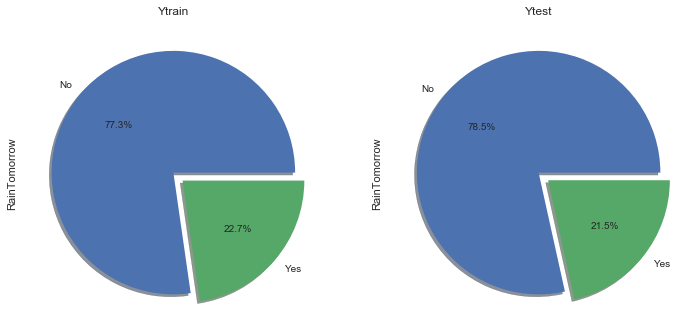

In [28]:
# 标签比例可视化
f,ax = plt.subplots(1,2,figsize = (12,6))
Ytrain.value_counts().plot.pie(explode=[0,0.1],autopct = '%.1f%%',shadow = True,ax =ax[0])
Ytest.value_counts().plot.pie(explode=[0,0.1],autopct = '%.1f%%',shadow = True,ax = ax[1])
ax[0].set_title('Ytrain')
ax[1].set_title('Ytest')

In [29]:
# 标签编码
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE = LE.fit(Ytrain)
Ytrain = LE.transform(Ytrain)
Ytest = LE.transform(Ytest)

In [30]:
print(type(Ytrain),type(Ytest)) # 编码后类型为数组

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [31]:
LE.classes_

array(['No', 'Yes'], dtype=object)

In [32]:
print(np.unique(Ytrain),np.unique(Ytest))

[0 1] [0 1]


不下雨为0 下雨为1

In [33]:
# 编码完成后变为dataframe
Ytrain = pd.DataFrame(Ytrain)
Ytest = pd.DataFrame(Ytest)

## 3.异常值处理

In [34]:
# 区分连续变量和分类变量

In [35]:
Xtrain.describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
MinTemp,6959.0,12.163501,6.394985,-6.9,-2.242,4.1,7.6,11.9,16.8,20.7,25.800,29.4
MaxTemp,6984.0,23.121420,7.119224,-4.1,8.900,14.4,18.0,22.5,28.1,33.0,40.000,44.7
Rainfall,6932.0,2.344057,7.574423,0.0,0.000,0.0,0.0,0.0,0.8,6.6,36.076,159.8
Evaporation,3913.0,5.369844,4.515142,0.0,0.400,1.4,2.6,4.8,7.2,9.8,17.000,145.0
Sunshine,3621.0,7.648716,3.706407,0.0,0.000,1.8,5.0,8.5,10.5,12.0,13.500,14.3
WindGustSpeed,6504.0,40.060732,13.746441,7.0,15.000,24.0,31.0,39.0,48.0,57.0,81.000,117.0
WindSpeed9am,6938.0,13.994523,8.943674,0.0,0.000,4.0,7.0,13.0,19.0,26.0,39.000,72.0
WindSpeed3pm,6845.0,18.854785,8.908815,0.0,2.000,9.0,13.0,19.0,24.0,30.0,44.000,87.0
Humidity9am,6931.0,69.053095,18.989564,5.0,18.000,45.0,57.0,70.0,83.0,94.0,100.000,100.0
Humidity3pm,6809.0,51.608459,20.735195,3.0,8.080,23.0,37.0,52.0,66.0,79.0,97.000,100.0


In [36]:
Xtest.describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
MinTemp,2983.0,12.363527,6.425094,-5.1,-1.918,4.1,7.7,12.2,17.100,20.90,25.700,28.5
MaxTemp,2996.0,23.463551,7.209239,-1.7,8.295,14.7,18.0,23.0,28.625,33.10,40.500,43.9
Rainfall,2958.0,2.239926,8.535829,0.0,0.000,0.0,0.0,0.0,0.575,5.60,36.286,183.4
Evaporation,1727.0,5.397221,3.777681,0.0,0.200,1.4,2.6,4.8,7.400,10.20,16.548,56.0
Sunshine,1566.0,7.836654,3.792873,0.0,0.000,1.6,5.1,8.8,10.800,12.35,13.435,13.9
WindGustSpeed,2811.0,39.866240,13.816820,9.0,15.000,24.0,31.0,39.0,46.000,57.00,83.000,115.0
WindSpeed9am,2974.0,13.990921,9.058556,0.0,0.000,4.0,7.0,13.0,19.000,26.00,41.000,57.0
WindSpeed3pm,2945.0,18.483531,8.997159,0.0,2.000,7.0,11.0,17.0,24.000,30.00,43.000,76.0
Humidity9am,2970.0,68.370370,19.152915,5.0,18.000,43.0,56.0,69.0,82.000,94.00,100.000,100.0
Humidity3pm,2924.0,50.944596,20.763506,1.0,9.000,24.0,36.0,51.0,64.000,79.00,97.770,100.0


In [37]:
# 建立分类变量列表
categ_col = Xtrain.columns[Xtrain.dtypes=='object'].tolist()
categ_col

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

In [38]:
categ_col.extend(['Cloud9am','Cloud3pm'])   # 不能写成cate_col = cate_col.extent(['Cloud9am','Cloud3pm'])
categ_col

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'Cloud9am',
 'Cloud3pm']

In [39]:
# 建立连续变量列表
cont_col = []
for i in Xtrain.columns:
    if i not in categ_col:
        cont_col.append(i)
        
cont_col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [40]:
# 定义异常值 减去均值大于3倍标准差
delxtrain = []
for i in cont_col:
    bool_ = np.abs((Xtrain.loc[:,i] - Xtrain[i].mean()) / Xtrain[i].std()) > 3
    ind = Xtrain[bool_].index.tolist()
    delxtrain.extend(ind)
    
deltrain = list(set(delxtrain))

delxtest = []
for i in cont_col:
    bool_ = np.abs((Xtest.loc[:,i] - Xtrain[i].mean()) / Xtrain[i].std()) > 3
    ind = Xtest[bool_].index.tolist()
    delxtest.extend(ind)
    
deltest = list(set(delxtest))

In [41]:
# 删除异常值
Xtrain = Xtrain.drop(index=deltrain,axis=0)
Ytrain = Ytrain.drop(index=deltrain,axis=0)
Xtest = Xtest.drop(index=deltest,axis=0)
Ytest = Ytest.drop(index=deltest,axis=0)

In [42]:
# 检查行数
print(Xtrain.shape,Ytrain.shape,Xtest.shape,Ytest.shape)

(6647, 21) (6647, 1) (2850, 21) (2850, 1)


In [43]:
# 恢复索引
for i in [Xtrain,Xtest,Ytrain,Ytest]:
    i.index = range(i.shape[0])
    
Xtrain.index

RangeIndex(start=0, stop=6647, step=1)

## 4.处理困难特征---日期

In [44]:
# Date与Rainfall构建Raintoday
# 将日期变为月份

In [45]:
# 构建RainToday

In [46]:
# 检查Rainfall是否有缺失值
print(Xtrain.Rainfall.isnull().sum(),Xtest.Rainfall.isnull().sum())

68 39


In [47]:
# 构建Xtrain
Xtrain.loc[Xtrain.Rainfall > 1,'Raintoday'] = 'yes'
Xtrain.loc[Xtrain.Rainfall < 1,'Raintoday'] = 'no'
Xtrain.loc[Xtrain.Rainfall.isnull(),'Raintoday'] = np.nan

# 构建Xtest
Xtest.loc[Xtest.Rainfall > 1,'Raintoday'] = 'yes'
Xtest.loc[Xtest.Rainfall < 1,'Raintoday'] = 'no'
Xtest.loc[Xtest.Rainfall.isnull(),'Raintoday'] = np.nan

In [48]:
# 构建月份

In [49]:
Xtrain['Date'] = Xtrain['Date'].apply(lambda x:int(x.split('-')[1]))
Xtest['Date'] = Xtest['Date'].apply(lambda x:int(x.split('-')[1]))
Xtrain.rename(columns = {'Date':'Month'},inplace = True)
Xtest.rename(columns = {'Date':'Month'},inplace = True)

## 5.处理分类变量缺失值

In [50]:
# 重新整理categ_col
categ_col.remove('Date')

In [51]:
categ_col.extend(['Month','Raintoday'])

In [52]:
# 分类变量缺失值预览
Xtrain[categ_col].isnull().mean()

Location       0.000000
WindGustDir    0.070709
WindDir9am     0.073567
WindDir3pm     0.028735
Cloud9am       0.375508
Cloud3pm       0.406349
Month          0.000000
Raintoday      0.026779
dtype: float64

In [53]:
Xtest[categ_col].isnull().mean()

Location       0.000000
WindGustDir    0.064561
WindDir9am     0.075789
WindDir3pm     0.027018
Cloud9am       0.374386
Cloud3pm       0.410526
Month          0.000000
Raintoday      0.025614
dtype: float64

In [54]:
# 利用每个月份的众数填充

In [55]:
# 需要用众数填充的列
categ_mode = Xtrain[categ_col].isnull().mean()[Xtrain[categ_col].isnull().mean() > 0].index.tolist()
categ_mode

['WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'Cloud9am',
 'Cloud3pm',
 'Raintoday']

In [56]:
mode_tab = pd.DataFrame(Xtrain[categ_mode[0]].groupby(Xtrain.Month).agg(lambda x:list((pd.Series.mode(x)))[0]))  # 先变成df
mode_tab

,WindGustDir
Month,
1,S
2,SSE
3,E
4,E
5,N
6,S
7,W
8,WNW
9,W


In [57]:
for var in categ_mode[1:]:
    mode_tab[var] = Xtrain[var].groupby(Xtrain.Month).agg(lambda x:list((pd.Series.mode(x)))[0])
mode_tab = mode_tab.reset_index()    
mode_tab

,Month,WindGustDir,WindDir9am,WindDir3pm,Cloud9am,Cloud3pm,Raintoday
0,1,S,SE,SE,7.0,7.0,no
1,2,SSE,SE,SSE,7.0,7.0,no
2,3,E,SSE,SE,7.0,7.0,no
3,4,E,N,S,7.0,7.0,no
4,5,N,NW,N,7.0,7.0,no
5,6,S,NW,S,7.0,7.0,no
6,7,W,N,W,7.0,7.0,no
7,8,WNW,N,W,7.0,7.0,no
8,9,W,N,WSW,7.0,7.0,no
9,10,E,N,SW,7.0,1.0,no


In [58]:
for var in categ_mode:
    for i in Xtrain[Xtrain[var].isnull()].index.tolist():
        ind = Xtrain.loc[i,'Month'] - 1
        Xtrain.loc[i,var] = mode_tab.loc[ind,var]

In [59]:
Xtrain[categ_mode].isnull().mean()

WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
Cloud9am       0.0
Cloud3pm       0.0
Raintoday      0.0
dtype: float64

In [60]:
for var in categ_mode:
    for i in Xtest[Xtest[var].isnull()].index.tolist():
        ind = Xtest.loc[i,'Month'] - 1
        Xtest.loc[i,var] = mode_tab.loc[ind,var]

In [61]:
Xtest[categ_mode].isnull().mean()

WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
Cloud9am       0.0
Cloud3pm       0.0
Raintoday      0.0
dtype: float64

In [62]:
# 备份数据
Xtrain_copy = Xtrain.copy()
Ytrain_copy = Ytrain.copy()
Xtest_copy = Xtest.copy()
Ytest_copy = Ytest.copy()

## 6.处理连续变量缺失值

In [96]:
# 利用当月平均值进行填充

In [64]:
Xtrain[cont_col].isnull().mean()

MinTemp          0.006018
MaxTemp          0.002257
Rainfall         0.010230
Evaporation      0.441853
Sunshine         0.482925
WindGustSpeed    0.070107
WindSpeed9am     0.009027
WindSpeed3pm     0.021814
Humidity9am      0.009328
Humidity3pm      0.026478
Pressure9am      0.103806
Pressure3pm      0.104408
Temp9am          0.003611
Temp3pm          0.020761
dtype: float64

In [65]:
Xtest[cont_col].isnull().mean()

MinTemp          0.005614
MaxTemp          0.001404
Rainfall         0.013684
Evaporation      0.421404
Sunshine         0.476140
WindGustSpeed    0.063860
WindSpeed9am     0.008070
WindSpeed3pm     0.018246
Humidity9am      0.009825
Humidity3pm      0.025263
Pressure9am      0.100351
Pressure3pm      0.101053
Temp9am          0.004912
Temp3pm          0.021053
dtype: float64

In [66]:
mean_tab = pd.DataFrame(Xtrain[cont_col[0]].groupby(Xtrain.Month).mean())
mean_tab

,MinTemp
Month,
1,17.111512
2,17.295670
3,15.771405
4,12.849472
5,8.929077
6,7.538682
7,7.145747
8,7.390714
9,9.882400


In [67]:
for var in cont_col[1:]:
    mean_tab[var] = Xtrain[var].groupby(Xtrain['Month']).mean()
mean_tab = mean_tab.reset_index()
mean_tab

,Month,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,1,17.111512,29.138095,1.167354,7.970262,9.493884,42.273224,14.758148,20.350694,62.066553,45.979203,1013.150659,1010.918797,22.181431,27.334083
1,2,17.295670,28.372541,1.369375,7.145000,8.970196,41.701559,14.623701,19.467230,66.278351,48.241015,1015.102968,1013.051826,21.408436,26.749683
2,3,15.771405,27.272150,1.400985,5.811699,7.699088,38.560633,12.260229,17.917492,70.770867,49.048093,1016.552007,1014.271715,19.797064,25.743729
3,4,12.849472,23.984303,1.337743,4.190415,7.086159,35.456238,12.336861,16.318584,69.875887,51.280576,1019.847217,1017.019770,17.852557,22.512522
4,5,8.929077,19.338132,1.664606,2.963793,6.222684,34.616915,11.702619,15.992138,76.129283,55.263911,1020.710995,1018.363573,13.352761,18.145298
5,6,7.538682,17.258794,1.819529,2.523323,5.873244,35.034296,11.854730,15.858362,79.278438,59.878007,1021.900936,1019.634953,11.312584,16.073129
6,7,7.145747,17.213585,1.769466,2.765190,6.195105,36.559118,12.541825,17.528626,76.226667,55.859345,1021.328216,1018.910373,11.084340,16.071319
7,8,7.390714,18.227807,1.669107,3.528840,7.281034,39.311069,13.089606,18.882784,72.636691,53.240223,1019.976832,1017.369505,12.251246,16.931009
8,9,9.882400,21.142600,1.452209,4.815328,8.028340,41.929638,15.317907,19.946830,64.563126,50.611789,1018.277925,1015.339602,15.744000,19.583537
9,10,11.828599,23.549237,1.189341,6.086254,8.397802,41.328512,14.975000,19.592955,63.390385,47.565558,1018.873434,1016.396970,17.306513,21.882261


In [68]:
# 填充Xtrain
for var in cont_col:
    for i in Xtrain[Xtrain[var].isnull()].index.tolist():
        ind = Xtrain.loc[i,'Month'] - 1
        Xtrain.loc[i,var] = mean_tab.loc[ind,var]

In [69]:
Xtrain[cont_col].isnull().mean()

MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustSpeed    0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Temp9am          0.0
Temp3pm          0.0
dtype: float64

In [70]:
# 填充Xtest
for var in cont_col:
    for i in Xtest[Xtest[var].isnull()].index.tolist():
        ind = Xtest.loc[i,'Month'] - 1
        Xtest.loc[i,var] = mean_tab.loc[ind,var]

In [71]:
Xtest.isnull().mean()

Month            0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
Raintoday        0.0
dtype: float64

In [72]:
# 整体验证
print(Xtrain.isnull().sum().sum())
print(Xtest.isnull().sum().sum())

0
0


In [73]:
# 备份数据
Xtrain_copy = Xtrain.copy()
Xtest_copy = Xtest.copy()

## 7.对分类变量进行编码

In [74]:
from sklearn.preprocessing import OrdinalEncoder

In [75]:
Xtrain = Xtrain_copy.copy()
Xtest = Xtest_copy.copy()

In [76]:
# 在categ_col中移除Month，Month不需要编码
categ_col.remove('Month')
categ_col

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'Cloud9am',
 'Cloud3pm',
 'Raintoday']

In [77]:
oe = OrdinalEncoder()
oe = oe.fit(Xtrain.loc[:,categ_col])

In [78]:
Xtrain.loc[:,categ_col] = oe.transform(Xtrain.loc[:,categ_col])

In [79]:
# Xtest.loc[:,categ_col] = oe.transform(Xtest.loc[:,categ_col]) 报错，因为test中存在train没有的值

In [80]:
for i in range(len(categ_col)):
    indexs = list(oe.categories_[i])
    Xtest[categ_col[i]] = Xtest[categ_col[i]].map(lambda x:indexs.index(x) if x in indexs else -1)

In [81]:
# 备份数据
Xtrain_copy = Xtrain.copy()
Xtest_copy = Xtest.copy()

In [82]:
# 复原categ_col表
categ_col.append('Month')

## 8.处理量纲问题

In [83]:
Xtrain[cont_col].describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,6647.0,12.061334,6.337902,-6.9,7.500000,11.800000,16.600000,29.1
MaxTemp,6647.0,23.139156,6.935108,2.5,18.100000,22.600000,28.100000,44.1
Rainfall,6647.0,1.487953,3.834232,0.0,0.000000,0.000000,0.600000,24.8
Evaporation,6647.0,5.093876,2.716416,0.0,2.963793,4.815328,7.000000,18.6
Sunshine,6647.0,7.713052,2.776559,0.0,6.222684,8.028340,9.487179,14.3
WindGustSpeed,6647.0,39.024682,11.982964,7.0,31.000000,38.560633,46.000000,81.0
WindSpeed9am,6647.0,13.486616,8.292903,0.0,7.000000,13.000000,19.000000,39.0
WindSpeed3pm,6647.0,18.390839,8.176958,0.0,13.000000,19.000000,24.000000,44.0
Humidity9am,6647.0,69.090467,18.419209,13.0,57.000000,70.000000,83.000000,100.0
Humidity3pm,6647.0,51.216206,19.869260,3.0,37.000000,52.000000,65.000000,100.0


In [84]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss = ss.fit(Xtrain.loc[:,cont_col])
Xtrain.loc[:,cont_col] = ss.transform(Xtrain.loc[:,cont_col])
Xtest.loc[:,cont_col] = ss.transform(Xtest.loc[:,cont_col])

In [85]:
Xtrain.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Raintoday
0,6,9.0,-2.613259,-1.418853,-0.388100,-1.286305,0.175391,2.0,-2.171970,7.0,15.0,-1.626406,-1.515450,0.553158,-0.413545,2.782210,2.629022,0.0,0.0,-2.315101,-1.323928,0.0
1,8,12.0,-0.924876,-1.173705,0.863875,-0.576183,-0.155606,14.0,1.249811,6.0,14.0,-0.541059,0.441415,1.298174,0.744110,0.423486,0.675622,7.0,7.0,-1.222210,-1.071658,1.0
2,12,4.0,1.031754,0.095297,-0.179437,0.882532,0.639014,8.0,-0.669725,8.0,9.0,0.182505,0.074503,0.049383,0.240782,-1.189577,-0.831726,7.0,7.0,0.620092,0.160012,0.0
3,3,32.0,1.268443,2.388152,-0.388100,1.217182,1.039836,0.0,1.500186,0.0,0.0,2.835575,0.196807,-1.633769,-1.822863,-0.550439,-0.647153,2.0,2.0,1.853497,2.489798,0.0
4,10,30.0,-0.277926,0.152979,-0.388100,0.365354,0.246637,9.0,-0.168976,9.0,9.0,-0.902842,0.196807,-0.602160,-0.363212,0.130309,0.121436,7.0,1.0,0.011195,-0.121937,0.0


In [86]:
# 备份数据
Xtrain = Xtrain.copy()
Xtest = Xtest.copy()
Ytrain = Ytrain.copy()
Ytest = Ytest.copy()

## 9.建立模型及模型评估

In [87]:
from time import time
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,recall_score

In [88]:
# 查看标签，sklearn标签要求是一维

In [89]:
print(Ytrain.shape,Ytest.shape)

(6647, 1) (2850, 1)


In [90]:
Ytrain = Ytrain.iloc[:,0].values
Ytest = Ytest.iloc[:,0].values

In [91]:
print(Ytrain.shape,Ytest.shape)

(6647,) (2850,)


In [94]:
# 核函数学习曲线
for kernel in ['linear','poly','rbf','sigmoid']:
    times = time()
    clf = SVC(kernel = kernel,
             gamma = 'auto',
             degree = 1).fit(Xtrain,Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest,result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("%s's testing accuracy is %f,recall is %f,auc is %f"%(kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time() - times).strftime('%M:%S:%f'))

linear's testing accuracy is 0.847018,recall is 0.400000,auc is 0.848218
00:05:349939
poly's testing accuracy is 0.848070,recall is 0.398261,auc is 0.848262
00:01:369503
rbf's testing accuracy is 0.824912,recall is 0.201739,auc is 0.789148
00:02:986677
sigmoid's testing accuracy is 0.741754,recall is 0.067826,auc is 0.425921
00:01:510509


模型的accuracy和auc勉强可以，但是recall不够高，在四种核函数下线性核函数表现最好。针对不同需求调参方向如下：
##### 追求recall分数高
##### 追求accuracy高，不计recall和auc
##### 达到accuracy recall auc的平衡

### 9.1 追求recall

In [101]:
# 更改class_weight
for kernel in ['linear','poly','rbf','sigmoid']:
    times = time()
    clf = SVC(kernel = kernel,
             gamma = 'auto',
             degree = 1,
             class_weight = 'balanced').fit(Xtrain,Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest,result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("%s's test accuracy is %f,recall is %f,auc is %f"%(kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time() - times).strftime('%M:%S:%f'))

linear's test accuracy is 0.787368,recall is 0.754783,auc is 0.848451
00:07:579536
poly's test accuracy is 0.782105,recall is 0.744348,auc is 0.847593
00:02:134844
rbf's test accuracy is 0.807018,recall is 0.480000,auc is 0.789749
00:03:378995
sigmoid's test accuracy is 0.760000,recall is 0.057391,auc is 0.426643
00:03:476781


linear和poly的recall都很高，锁定linear核函数

In [104]:
# 继续增加少数样本的权重
times = time()
clf = SVC(kernel = 'linear',
          gamma = 'auto',
          class_weight = {0:1,1:10}).fit(Xtrain,Ytrain)
result = clf.predict(Xtest)
score = clf.score(Xtest,Ytest)
recall = recall_score(Ytest,result)
auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
print("linear test accuracy is %f,recall is %f,auc is %f"%(score,recall,auc))
print(datetime.datetime.fromtimestamp(time() - times).strftime('%M:%S:%f'))

linear test accuracy is 0.614386,recall is 0.916522,auc is 0.846807
00:13:744686


accuracy下降，但是recall和auc上升明显，说明增大少数类样本取值后模型捕捉了大量少数类但是损伤了很多多数类

In [108]:
recall = []
auc = []
score = []
for k in range(1,21,1):
    clf = SVC(kernel = 'linear',gamma = 'auto',class_weight = {1:k}).fit(Xtrain,Ytrain)
    result = clf.predict(Xtest)
    score.append(clf.score(Xtest,Ytest))
    recall.append(recall_score(Ytest,result))
    auc.append(roc_auc_score(Ytest,clf.decision_function(Xtest)))

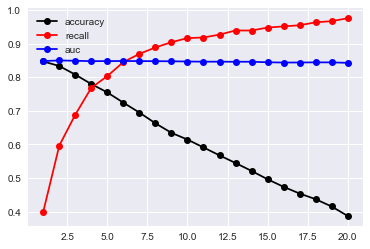

In [109]:
plt.plot(range(1,21,1),score,color = 'k',marker = 'o',label = 'accuracy')
plt.plot(range(1,21,1),recall,color = 'r',marker = 'o',label = 'recall')
plt.plot(range(1,21,1),auc,color = 'blue',marker = 'o',label = 'auc')
plt.legend()
plt.show()

从图表中得出，随着样本向少数类偏移，模型的召回率提升，但是伴随着模型的准确率急剧下降

### 9.2 追求accuracy

In [110]:
valuec = pd.Series(Ytest).value_counts()
print(valuec)
print(valuec[0]/valuec.sum())

0    2275
1     575
dtype: int64
0.7982456140350878


初步断定，样本将近80%是多数类样本，采用线性核函数不对少数类样本进行偏重时准确率为84.7%，说明模型已经将大部分多数类分类正确，通过混淆矩阵计算特异度，来查看在多数类样本上的准确率是否还有提升的空间

In [112]:
# 查看模型的特异度
from sklearn.metrics import confusion_matrix as CM
clf = SVC(kernel = 'linear',gamma = 'auto').fit(Xtrain,Ytrain)
result = clf.predict(Xtest)
cm = CM(Ytest,result,labels=(1,0))
cm

array([[ 230,  345],
       [  91, 2184]], dtype=int64)

In [113]:
specificity = cm[1,1]/cm[1,:].sum()
specificity

0.96

此时模型的特异度非常高，如果要求模型把所有类都判为0会误伤已经识别的少数类，从而导致整体的准确率下降；如果希望模型识别出更多的少数类来提升准确率却无法实现，因为一旦模型识别出更多的少数类必然会损伤更多的多数类；尝试模型的class_weight稍微向少数类倾斜，是否能够提升模型的准确率，如果出现更高的准确率说明模型的准确率还没有达到极限

In [116]:
# class_weight稍微向少数类倾斜
irange = np.linspace(0.01,0.05,10)
for i in irange:
    times = time()
    clf = SVC(kernel = 'linear',gamma = 'auto',class_weight = {1:1+i}).fit(Xtrain,Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest,result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("under rate 1:%f,accuracy is %f,recall is %f,auc is %f"%(1+i,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time() - times).strftime('%M:%S:%f'))

under rate 1:1.010000,accuracy is 0.847368,recall is 0.401739,auc is 0.848219
00:06:114438
under rate 1:1.014444,accuracy is 0.847719,recall is 0.403478,auc is 0.848290
00:08:754670
under rate 1:1.018889,accuracy is 0.848070,recall is 0.405217,auc is 0.848360
00:06:777031
under rate 1:1.023333,accuracy is 0.848421,recall is 0.406957,auc is 0.848304
00:07:063233
under rate 1:1.027778,accuracy is 0.848070,recall is 0.406957,auc is 0.848344
00:08:230615
under rate 1:1.032222,accuracy is 0.848070,recall is 0.406957,auc is 0.848531
00:07:170990
under rate 1:1.036667,accuracy is 0.848070,recall is 0.408696,auc is 0.848560
00:08:484052
under rate 1:1.041111,accuracy is 0.848070,recall is 0.408696,auc is 0.848551
00:07:976313
under rate 1:1.045556,accuracy is 0.848070,recall is 0.412174,auc is 0.848421
00:08:494522
under rate 1:1.050000,accuracy is 0.848421,recall is 0.413913,auc is 0.848392
00:07:845460


模型的最高准确率达到84.84%超过之前的84.7%，说明模型还有潜力，通过学习曲线进行调整

In [119]:
irange = np.linspace(0.04,0.06,10)
for i in irange:
    times = time()
    clf = SVC(kernel = 'linear',gamma = 'auto',class_weight = {1:1+i}).fit(Xtrain,Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest,result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print('under rate 1:%f,accuracy is %f,recall is %f,auc is %f'%(i+1,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time() - times).strftime('%M:%S:%f'))

under rate 1:1.040000,accuracy is 0.848070,recall is 0.408696,auc is 0.848546
00:07:215306
under rate 1:1.042222,accuracy is 0.848070,recall is 0.408696,auc is 0.848550
00:07:376448
under rate 1:1.044444,accuracy is 0.848070,recall is 0.412174,auc is 0.848423
00:08:070559
under rate 1:1.046667,accuracy is 0.848070,recall is 0.412174,auc is 0.848417
00:07:202926
under rate 1:1.048889,accuracy is 0.848070,recall is 0.413913,auc is 0.848391
00:08:758826
under rate 1:1.051111,accuracy is 0.847719,recall is 0.413913,auc is 0.848398
00:07:754975
under rate 1:1.053333,accuracy is 0.847368,recall is 0.413913,auc is 0.848323
00:07:898096
under rate 1:1.055556,accuracy is 0.847368,recall is 0.413913,auc is 0.848313
00:07:696629
under rate 1:1.057778,accuracy is 0.847719,recall is 0.415652,auc is 0.848321
00:08:792311
under rate 1:1.060000,accuracy is 0.847719,recall is 0.415652,auc is 0.848308
00:08:166782


在线性和函数支持向量机下的模型准确率最高达84.8%，更换逻辑回归查看是否能够提升准确度

In [122]:
from sklearn.linear_model import LogisticRegression as LR
logclf = LR(solver = 'liblinear').fit(Xtrain,Ytrain)
logclf.score(Xtest,Ytest)

0.843859649122807

In [123]:
score = []
C_range = np.linspace(1,5,10)
for C in C_range:
    logclf = LR(solver = 'liblinear',C = C).fit(Xtrain,Ytrain)
    score.append(logclf.score(Xtest,Ytest))
    print(C,logclf.score(Xtest,Ytest))

1.0 0.843859649122807
1.4444444444444444 0.8435087719298245
1.8888888888888888 0.8431578947368421
2.333333333333333 0.8431578947368421
2.7777777777777777 0.8431578947368421
3.2222222222222223 0.8431578947368421
3.6666666666666665 0.8431578947368421
4.111111111111111 0.8431578947368421
4.555555555555555 0.8431578947368421
5.0 0.8431578947368421


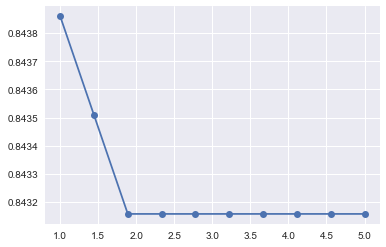

In [124]:
plt.plot(C_range,score,marker = 'o')
plt.show()

可见利用支持向量机得出的准确率稍微高于利用逻辑回归得出的准确率，但是二者差别不大

## 9.3 追求accuracy与recall的平衡

In [125]:
C_range = np.linspace(0.01,20,20)
scoreall = []
recallall = []
aucall = []
for C in C_range:
    times = time()
    clf = SVC(kernel = 'linear',C = C,class_weight = 'balanced').fit(Xtrain,Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest,result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    scoreall.append(score)
    recallall.append(recall)
    aucall.append(auc)
    print('under C = %f,accuracy is %f,recall is %f,auc is %f'%(C,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time() - times).strftime('%M:%S:%f'))

under C = 0.010000,accuracy is 0.779298,recall is 0.746087,auc is 0.845839
00:01:686002
under C = 1.062105,accuracy is 0.787368,recall is 0.754783,auc is 0.848443
00:10:797691
under C = 2.114211,accuracy is 0.787719,recall is 0.753043,auc is 0.848406
00:18:053055
under C = 3.166316,accuracy is 0.787368,recall is 0.753043,auc is 0.848443
00:26:317427
under C = 4.218421,accuracy is 0.787719,recall is 0.754783,auc is 0.848342
00:36:894783
under C = 5.270526,accuracy is 0.787368,recall is 0.753043,auc is 0.848354
00:40:735245
under C = 6.322632,accuracy is 0.786667,recall is 0.751304,auc is 0.848359
00:49:994278
under C = 7.374737,accuracy is 0.787018,recall is 0.753043,auc is 0.848389
00:55:533504
under C = 8.426842,accuracy is 0.787719,recall is 0.754783,auc is 0.848369
01:06:024725
under C = 9.478947,accuracy is 0.787368,recall is 0.753043,auc is 0.848389
01:10:135568
under C = 10.531053,accuracy is 0.786667,recall is 0.751304,auc is 0.848406
01:16:732889
under C = 11.583158,accuracy is

0.848442618251314 1.0621052631578947


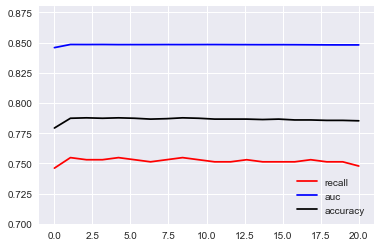

In [128]:
print(max(aucall),C_range[aucall.index(max(aucall))])
plt.figure()
plt.plot(C_range,recallall,color = 'r',label = 'recall')
plt.plot(C_range,aucall,color = 'blue',label = 'auc')
plt.plot(C_range,scoreall,color = 'k',label = 'accuracy')
plt.legend(loc = 4)
plt.ylim([0.70,0.88])
plt.show()

随着C值变大，模型运行速度变慢，对于SVM来说本身运行速度不快，C值过大消耗增大。C值较小时模型各项指标都较低，当C大于1时模型表现逐步开始稳定，当C变大时模型表现并未出现显著提升。auc在0.85左右，变化，可见增大C值不能使模型发生实质的改变

In [129]:
# 将最佳C值带入
times = time()
clf = SVC(kernel = 'linear',C = 1.0621052631578947,class_weight = 'balanced').fit(Xtrain,Ytrain)
result = clf.predict(Xtest)
score = clf.score(Xtest,Ytest)
recall = recall_score(Ytest,result)
auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
print('test accuracy is %f,recall is %f,auc is %f'%(score,recall,auc))
print(datetime.datetime.fromtimestamp(time() - times).strftime('%M:%S:%f'))

test accuracy is 0.787368,recall is 0.754783,auc is 0.848443
00:10:795429


##### 此种条件下accuracy recall auc是平衡的结果，并未太差，也不算太好。
##### 要想进一步提升auc,单纯调节支持向量机的参数已不能满足要求，需要绘制ROC曲线，查看是否可以通过调节阈值来d对模型进行改进

In [130]:
# 调整ROC曲线阈值

In [132]:
from sklearn.metrics import roc_curve as ROC
fpr,recall,thresholds = ROC(Ytest,clf.decision_function(Xtest),pos_label = 1)
area = roc_auc_score(Ytest,clf.decision_function(Xtest))

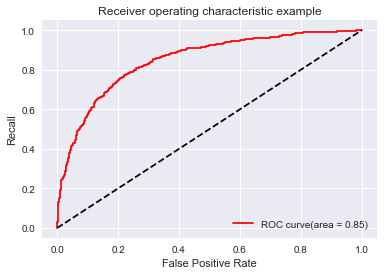

In [133]:
# 绘制ROC曲线
plt.figure()
plt.plot(fpr,recall,color = 'r',label = 'ROC curve(area = %.2f)'%area)
plt.plot([0,1],[0,1],color = 'k',linestyle = '--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc = 'lower right')
plt.show()

In [134]:
# 求最佳阈值
maxindex = (recall - fpr).tolist().index(max(recall - fpr))
thresholds[maxindex]

-0.06834018905769645

In [135]:
print(type(recall - fpr))
print((recall - fpr).shape)

<class 'numpy.ndarray'>
(614,)


In [136]:
# 根据选出的最佳阈值，确定y_predict，并确定这个阈值下的recall和accuracy

In [137]:
from sklearn.metrics import accuracy_score as AC
clf = SVC(kernel = 'linear',C = 1.0621052631578947,class_weight = 'balanced').fit(Xtrain,Ytrain)

In [138]:
prob = pd.DataFrame(clf.decision_function(Xtest))

In [141]:
prob.loc[prob.iloc[:,0] >= thresholds[maxindex],'y_pred'] = 1
prob.loc[prob.iloc[:,0] < thresholds[maxindex],'y_pred'] = 0

In [142]:
# 检查模型本身的准确度
score = AC(Ytest,prob.loc[:,'y_pred'].values)
recall = recall_score(Ytest,prob.loc[:,'y_pred'])
print('testiing accuracy is %f,recall is %f'%(score,recall))

testiing accuracy is 0.778947,recall is 0.772174


调整的结果不如没有调整的好。可见如果追求平衡SVM模型本身已经非常接近最优结果了